**11.** Computing with a nonconjugate single-parameter model: suppose $y1, . . . , y5$ are independent
samples from a Cauchy distribution with unknown center $θ$ and known scale $1$:
$p\left ( y_i\mid \theta  \right )\propto 1/\left (1 + \left ( y_i - \theta \right )^2 \right )$. Assume, for simplicity, that the prior distribution for $θ$ is
uniform on $[0, 100]$. Given the observations $(y1, . . . , y5) = (43, 44, 45, 46.5, 47.5)$:

(a) Compute the unnormalized posterior density function, $p(θ)p(y|θ)$, on a grid of points
$\theta = 0, \frac{1}{m},\frac{2}{m},...,100$, for some large integer $m$. Using the grid approximation, compute
and plot the normalized posterior density function, $p(θ|y)$, as a function of $θ$.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [159]:
grid_points = 1000
y = np.array([43,44,45,46.5, 47.7])
θ = np.linspace(0, 100, grid_points)

# prior
prior = np.repeat(st.uniform.rvs(0, 100), grid_points)

# likelihood at each point in the grid
likelihood = np.array([np.prod(st.cauchy.pdf(y, loc = θ[i], scale = 1)) for i in range(θ.shape[0])])

# product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior
post_grid = unstd_posterior /  (0.1 * unstd_posterior.sum())

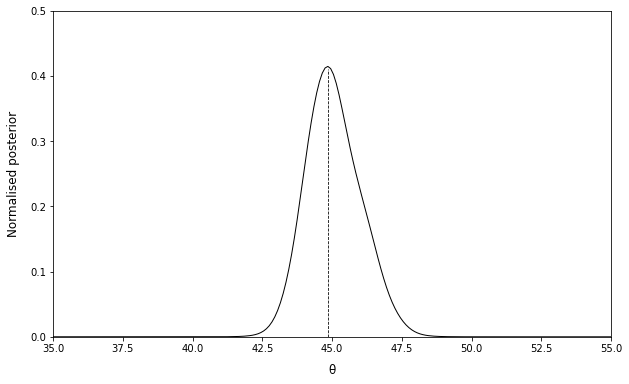

In [162]:
plt.figure(figsize = (10, 6))
plt.plot(θ, post_grid, 'k', lw = 1)
plt.axvline(x = θ[np.argmax(post_grid)], ymin = 0.0, ymax = 0.82, color='k', ls = '--', lw = 0.8)
plt.xlim(35, 55)
plt.ylim(0, 0.5)
plt.xlabel('θ', fontsize=12, labelpad = 10)
plt.ylabel('Normalised posterior', fontsize=12, labelpad = 10);

(b) Sample 1000 draws of $θ$ from the posterior density and plot a histogram of the draws.

In [94]:
θ_samples = np.random.choice(θ, p=post_grid, size=1000, replace=True)

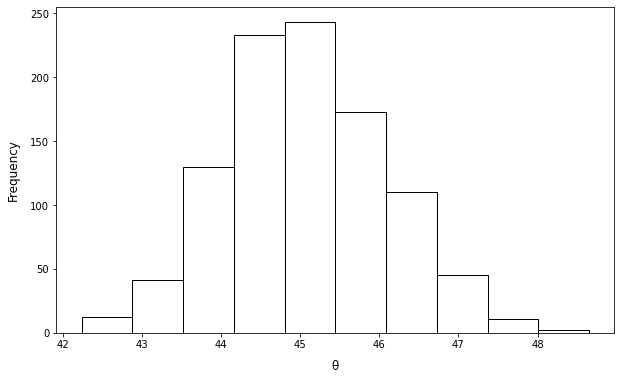

In [164]:
plt.figure(figsize = (10, 6))
plt.hist(θ_samples, edgecolor='black', facecolor = 'white', density = False)
plt.xlabel('θ', fontsize=12, labelpad = 10)
plt.ylabel('Frequency', fontsize=12, labelpad = 10);

(c) Use the 1000 samples of $θ$ to obtain 1000 samples from the predictive distribution of
a future observation, $y_6$, and plot a histogram of the predictive draws.

In [96]:
y6 = st.cauchy.rvs(θ_samples, 1, size = θ_samples.shape[0])

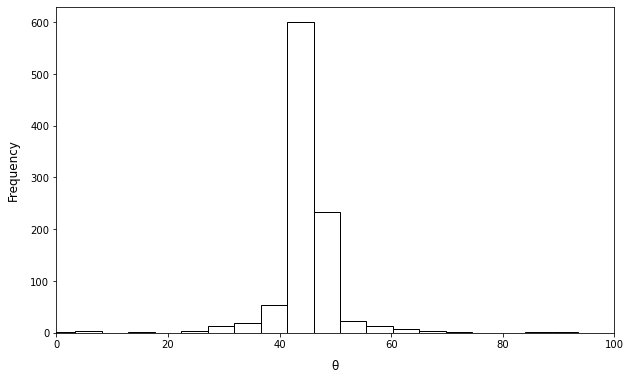

In [165]:
plt.figure(figsize = (10, 6))
plt.hist(y6, bins = 701, edgecolor='black', facecolor = 'white', density = False)
plt.xlim(0, 100)
plt.xlabel('θ', fontsize=12, labelpad = 10)
plt.ylabel('Frequency', fontsize=12, labelpad = 10);